# Big Data Real-Time Analytics with Python and Spark

## Chapter 9 -  Machine learning in python language Part 1

### Mini project 1 - Process for Building, Training, Evaluating and Selecting Models for Classification

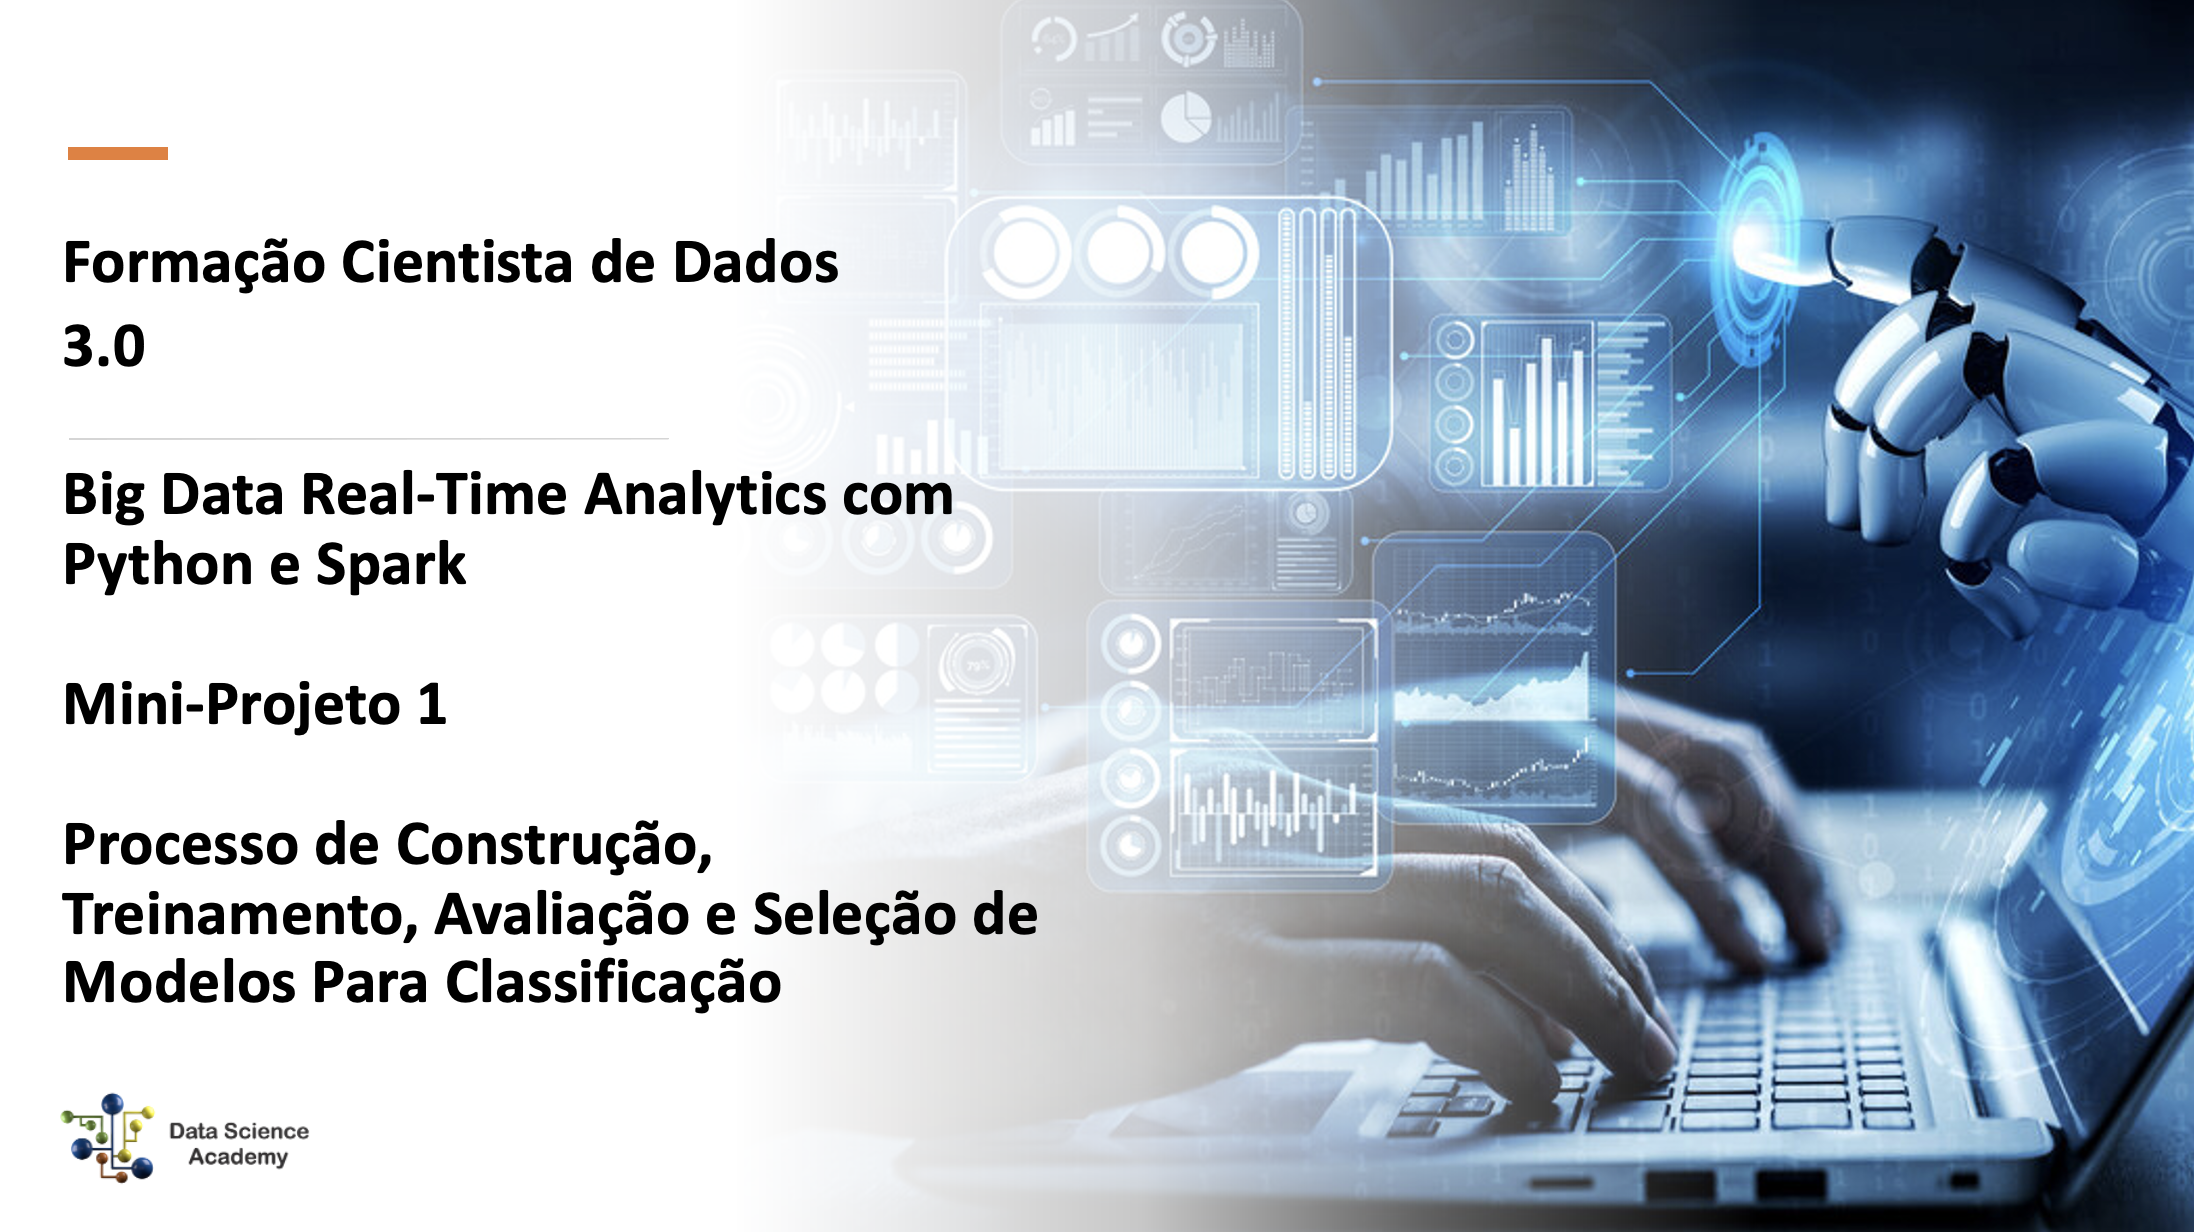

In [1]:
# Python version
from platform import python_version
print('The version used in this notebook is: ', python_version())

The version used in this notebook is:  3.8.13


In [2]:
# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a 'Bianca Amorim' --iversions

Author: Bianca Amorim

matplotlib: 3.4.3
pandas    : 1.4.2
seaborn   : 0.11.2
joblib    : 1.1.0
sklearn   : 1.1.3
numpy     : 1.22.3



## Loading dataset

In [4]:
# Loading dataset
dataset = pd.read_csv('datasets/dataset.csv')

In [5]:
# Shape
dataset.shape

(583, 11)

In [6]:
# Columns
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
# Sample of data
dataset.sample(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
382   58  Female              0.7               0.1                   172   
582   38    Male              1.0               0.3                   216   
109   36    Male              0.9               0.1                   486   
66    54    Male              2.2               1.2                   195   
505   32    Male             32.6              14.1                   219   
391   75    Male              0.9               0.2                   162   
252   65    Male              1.1               0.3                   258   
97    39    Male              6.6               3.0                   215   
210   28    Male              0.8               0.3                   190   
337   75    Male              2.5               1.2                   375   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
382                        27                          22             6.7   
582                        21                          24             7.3   
109                        25                          34             5.9   
66                         55                          95             6.0   
505                        95                         235             5.8   
391                        25                          20             6.9   
252                        48                          40             7.0   
97                        190                         950             4.0   
210                        20                          14             4.1   
337                        85                          68             6.4   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
382      3.2                         0.9        1  
582      4.4                         1.5        2  
109      2.8                         0.9        2  
66       3.7                         1.6        1  
505      3.1                         1.1        1  
391      3.7                         1.1        1  
252      3.9                         1.2        2  
97       1.7                         0.7        1  
210      2.4                         1.4        1  
337      2.9                         0.8        1

## Exploratory Data Analysis

In [8]:
# data types
dataset.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [9]:
# Categorical variable
dataset.dtypes[dataset.dtypes == 'object']

Gender    object
dtype: object

In [10]:
# Numerical variable
dataset.dtypes[dataset.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

## Exploring the Numerical Variables

In [11]:
dataset.describe( )

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

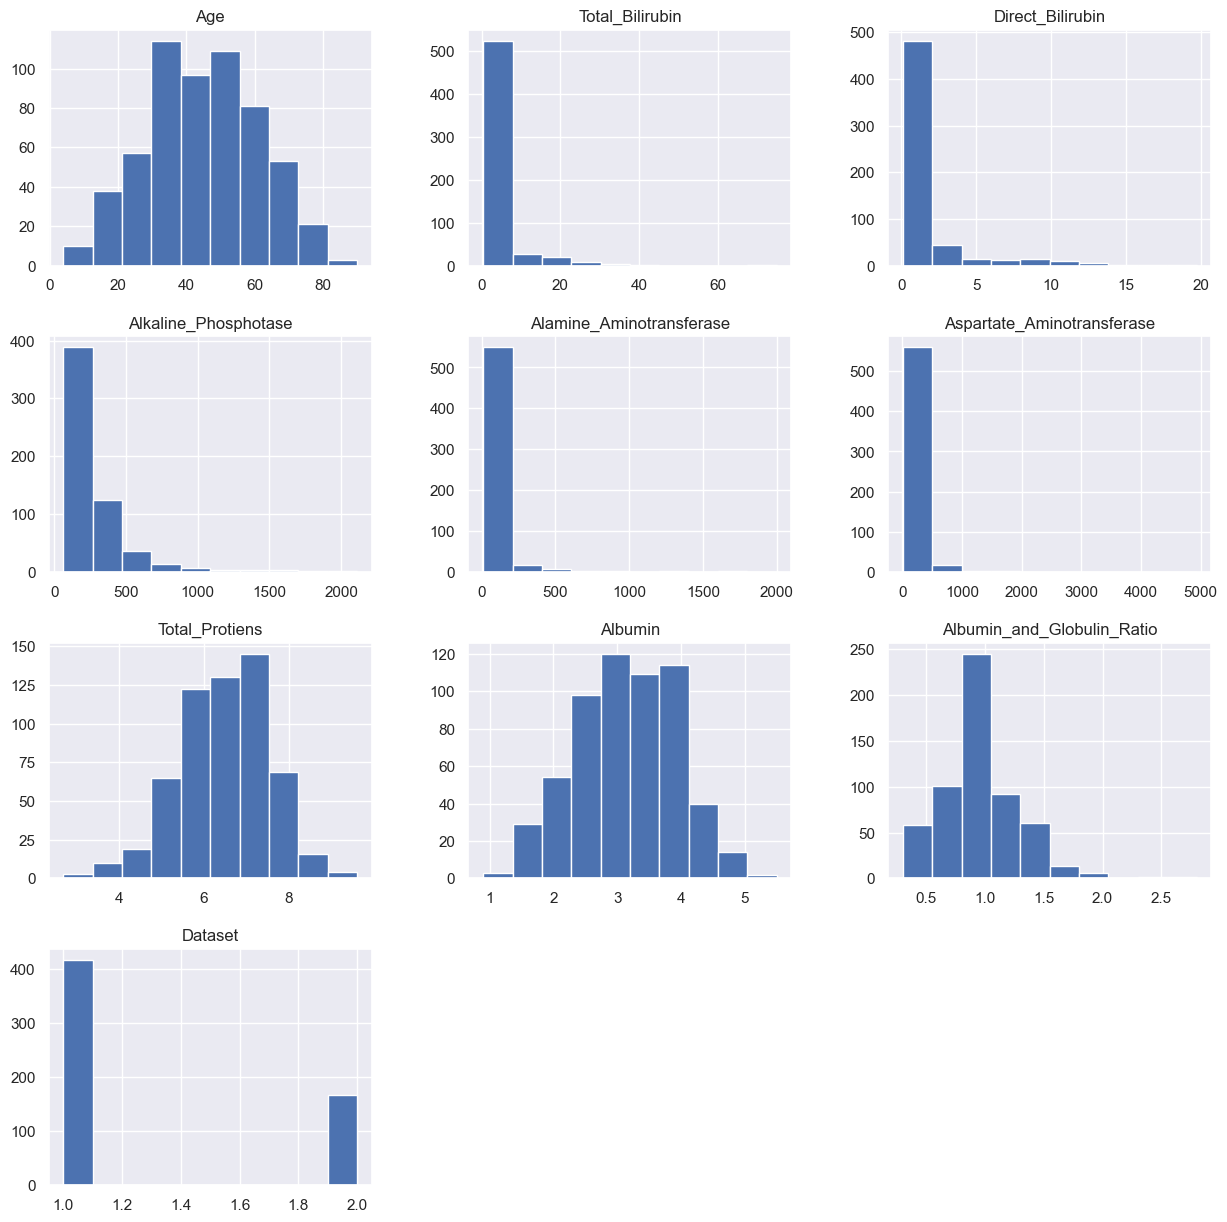

In [12]:
# Plot
sns.set()
dataset.hist(figsize = (15, 15), bins = 10)
plt.show()

It seems there are outliers in variables **Alamine_aminotranferase, Aspartate_Aminotransferase**, because the maximum value is much higher than the mean value.

The dataset column (Target variable) has the value '1' for hepatic disease and '2' for no hepatic disease. Let's ajust the variable to values that are easier to interpret. The negative class (no disease) will be zero (0).

In [13]:
# Function to ajust the target variable
def ajust_var(x):
    if x == 2:
        return 0
    return 1

In [14]:
# Aplying Function
dataset['Dataset'] = dataset['Dataset'].map(ajust_var)

In [15]:
# Ajust target variable name
dataset.rename({'Dataset': 'Target'}, axis = 'columns', inplace = True)

In [16]:
dataset.sample(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
517   28    Male              0.9               0.2                   215   
190   60    Male              6.3               3.2                   314   
71    75  Female              0.8               0.2                   188   
353   48  Female              1.4               0.8                   621   
52    38    Male              3.1               1.6                   253   
65    57    Male              1.4               0.7                   470   
571   90    Male              1.1               0.3                   215   
455   21  Female              0.6               0.1                   186   
436   23    Male              1.0               0.3                   212   
270   37    Male              0.7               0.2                   235   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
517                        50                          28             8.0   
190                       118                         114             6.6   
71                         20                          29             4.4   
353                       110                         176             7.2   
52                         80                         406             6.8   
65                         62                          88             5.6   
571                        46                         134             6.9   
455                        25                          22             6.8   
436                        41                          80             6.2   
270                        96                          54             9.5   

     Albumin  Albumin_and_Globulin_Ratio  Target  
517      4.0                        1.00       1  
190      3.7                        1.27       1  
71       1.8                        0.60       1  
353      3.9                        1.10       1  
52       3.9                        1.30       1  
65       2.5                        0.80       1  
571      3.0                        0.70       1  
455      3.4                        1.00       1  
436      3.1                        1.00       1  
270      4.9                        1.00       1

In [17]:
# Correlation between the variable
dataset.corr()

Age  Total_Bilirubin  Direct_Bilirubin  \
Age                         1.000000         0.011763          0.007529   
Total_Bilirubin             0.011763         1.000000          0.874618   
Direct_Bilirubin            0.007529         0.874618          1.000000   
Alkaline_Phosphotase        0.080425         0.206669          0.234939   
Alamine_Aminotransferase   -0.086883         0.214065          0.233894   
Aspartate_Aminotransferase -0.019910         0.237831          0.257544   
Total_Protiens             -0.187461        -0.008099         -0.000139   
Albumin                    -0.265924        -0.222250         -0.228531   
Albumin_and_Globulin_Ratio -0.216408        -0.206267         -0.200125   
Target                      0.137351         0.220208          0.246046   

                            Alkaline_Phosphotase  Alamine_Aminotransferase  \
Age                                     0.080425                 -0.086883   
Total_Bilirubin                         0.206669                  0.214065   
Direct_Bilirubin                        0.234939                  0.233894   
Alkaline_Phosphotase                    1.000000                  0.125680   
Alamine_Aminotransferase                0.125680                  1.000000   
Aspartate_Aminotransferase              0.167196                  0.791966   
Total_Protiens                         -0.028514                 -0.042518   
Albumin                                -0.165453                 -0.029742   
Albumin_and_Globulin_Ratio             -0.234166                 -0.002375   
Target                                  0.184866                  0.163416   

                            Aspartate_Aminotransferase  Total_Protiens  \
Age                                          -0.019910       -0.187461   
Total_Bilirubin                               0.237831       -0.008099   
Direct_Bilirubin                              0.257544       -0.000139   
Alkaline_Phosphotase                          0.167196       -0.028514   
Alamine_Aminotransferase                      0.791966       -0.042518   
Aspartate_Aminotransferase                    1.000000       -0.025645   
Total_Protiens                               -0.025645        1.000000   
Albumin                                      -0.085290        0.784053   
Albumin_and_Globulin_Ratio                   -0.070040        0.234887   
Target                                        0.151934       -0.035008   

                             Albumin  Albumin_and_Globulin_Ratio    Target  
Age                        -0.265924                   -0.216408  0.137351  
Total_Bilirubin            -0.222250                   -0.206267  0.220208  
Direct_Bilirubin           -0.228531                   -0.200125  0.246046  
Alkaline_Phosphotase       -0.165453                   -0.234166  0.184866  
Alamine_Aminotransferase   -0.029742                   -0.002375  0.163416  
Aspartate_Aminotransferase -0.085290                   -0.070040  0.151934  
Total_Protiens              0.784053                    0.234887 -0.035008  
Albumin                     1.000000                    0.689632 -0.161388  
Albumin_and_Globulin_Ratio  0.689632                    1.000000 -0.163131  
Target                     -0.161388                   -0.163131  1.000000

## Exploring the Categorical Variables

In [18]:
# Exploring the Categorical Variables
dataset.describe(include = ['object'])

Gender
count     583
unique      2
top      Male
freq      441

number of male patients:  441
number of female patients:  142


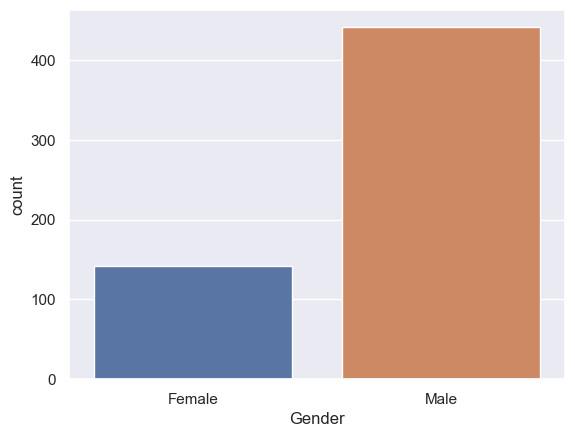

In [19]:
# Plot
sns.countplot(data = dataset, x = 'Gender', label = 'Count')

# Value counts
M, F = dataset['Gender'].value_counts()

print('number of male patients: ', M)
print('number of female patients: ', F)

Let's take advantage of this and already transform the categorical variable into its numerical representation using label encoding. Besides reducing the work later, it will facilitate the creation of the graphs below.

In [20]:
# Function to label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [21]:
# Apply the funtion
dataset['Gender'] = dataset['Gender'].map(encoding_func)

In [22]:
dataset.sample(5)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
355   19       0              1.4               0.8                   178   
66    54       0              2.2               1.2                   195   
439   42       1              0.8               0.2                   168   
313   30       1              0.8               0.2                   158   
379   72       0              0.7               0.2                   185   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
355                        13                          26             8.0   
66                         55                          95             6.0   
439                        25                          18             6.2   
313                        25                          22             7.9   
379                        16                          22             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Target  
355      4.6                         1.3       0  
66       3.7                         1.6       1  
439      3.1                         1.0       1  
313      4.5                         1.3       0  
379      3.7                         1.0       0

## Checking the relationship between attributes
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

In [23]:
dataset.corr() 

Age    Gender  Total_Bilirubin  \
Age                         1.000000 -0.056560         0.011763   
Gender                     -0.056560  1.000000        -0.089291   
Total_Bilirubin             0.011763 -0.089291         1.000000   
Direct_Bilirubin            0.007529 -0.100436         0.874618   
Alkaline_Phosphotase        0.080425  0.027496         0.206669   
Alamine_Aminotransferase   -0.086883 -0.082332         0.214065   
Aspartate_Aminotransferase -0.019910 -0.080336         0.237831   
Total_Protiens             -0.187461  0.089121        -0.008099   
Albumin                    -0.265924  0.093799        -0.222250   
Albumin_and_Globulin_Ratio -0.216408  0.003424        -0.206267   
Target                      0.137351 -0.082416         0.220208   

                            Direct_Bilirubin  Alkaline_Phosphotase  \
Age                                 0.007529              0.080425   
Gender                             -0.100436              0.027496   
Total_Bilirubin                     0.874618              0.206669   
Direct_Bilirubin                    1.000000              0.234939   
Alkaline_Phosphotase                0.234939              1.000000   
Alamine_Aminotransferase            0.233894              0.125680   
Aspartate_Aminotransferase          0.257544              0.167196   
Total_Protiens                     -0.000139             -0.028514   
Albumin                            -0.228531             -0.165453   
Albumin_and_Globulin_Ratio         -0.200125             -0.234166   
Target                              0.246046              0.184866   

                            Alamine_Aminotransferase  \
Age                                        -0.086883   
Gender                                     -0.082332   
Total_Bilirubin                             0.214065   
Direct_Bilirubin                            0.233894   
Alkaline_Phosphotase                        0.125680   
Alamine_Aminotransferase                    1.000000   
Aspartate_Aminotransferase                  0.791966   
Total_Protiens                             -0.042518   
Albumin                                    -0.029742   
Albumin_and_Globulin_Ratio                 -0.002375   
Target                                      0.163416   

                            Aspartate_Aminotransferase  Total_Protiens  \
Age                                          -0.019910       -0.187461   
Gender                                       -0.080336        0.089121   
Total_Bilirubin                               0.237831       -0.008099   
Direct_Bilirubin                              0.257544       -0.000139   
Alkaline_Phosphotase                          0.167196       -0.028514   
Alamine_Aminotransferase                      0.791966       -0.042518   
Aspartate_Aminotransferase                    1.000000       -0.025645   
Total_Protiens                               -0.025645        1.000000   
Albumin                                      -0.085290        0.784053   
Albumin_and_Globulin_Ratio                   -0.070040        0.234887   
Target                                        0.151934       -0.035008   

                             Albumin  Albumin_and_Globulin_Ratio    Target  
Age                        -0.265924                   -0.216408  0.137351  
Gender                      0.093799                    0.003424 -0.082416  
Total_Bilirubin            -0.222250                   -0.206267  0.220208  
Direct_Bilirubin           -0.228531                   -0.200125  0.246046  
Alkaline_Phosphotase       -0.165453                   -0.234166  0.184866  
Alamine_Aminotransferase   -0.029742                   -0.002375  0.163416  
Aspartate_Aminotransferase -0.085290                   -0.070040  0.151934  
Total_Protiens              0.784053                    0.234887 -0.035008  
Albumin                     1.000000                    0.689632 -0.161388  
Albumin_and_Globulin_Ratio  0.689632                   

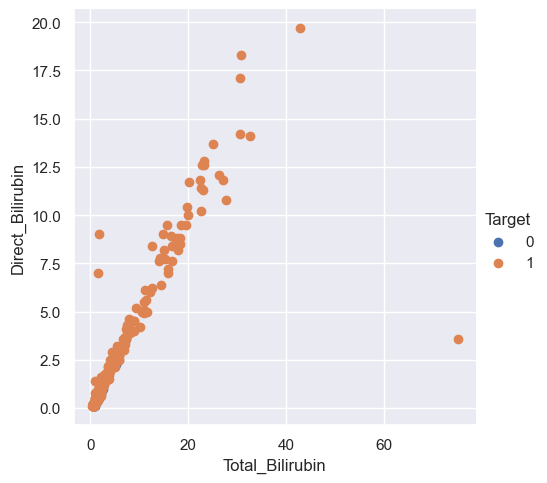

In [24]:
# Sets the background style
sns.set_style('darkgrid')

# FacetGrid 
sns.FacetGrid(dataset, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend();

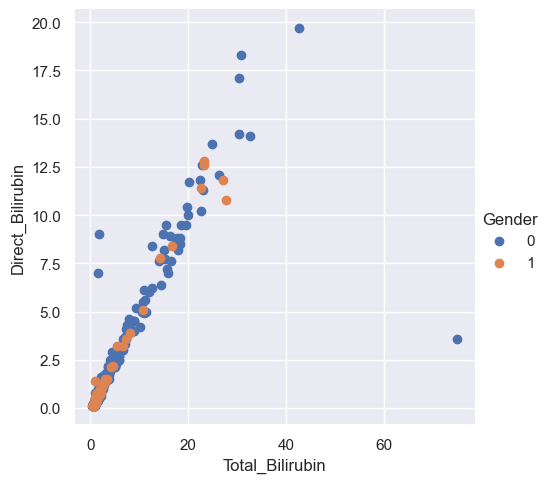

In [25]:
# Sets the background style
sns.set_style('darkgrid')

# FacetGrid
sns.FacetGrid(dataset, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend();

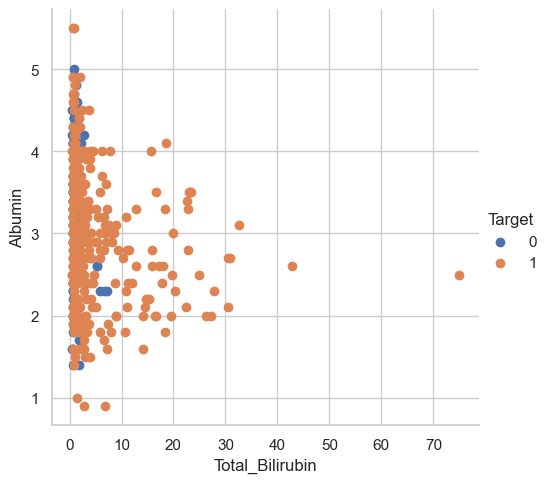

In [26]:
# Sets the background style
sns.set_style('whitegrid')

# FacetGrid
sns.FacetGrid(dataset, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend();

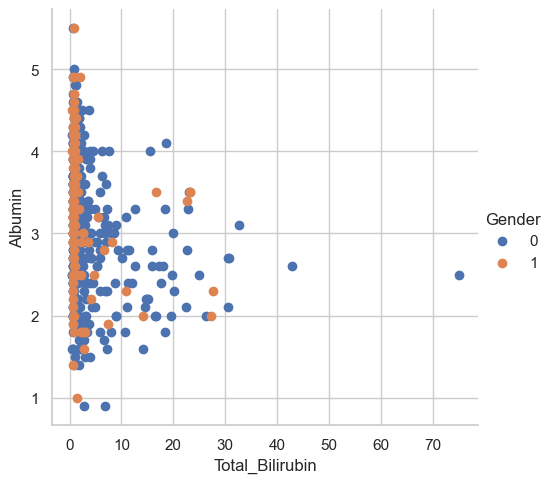

In [27]:
# Sets the background style
sns.set_style('whitegrid')

# FacetGrid
sns.FacetGrid(dataset, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend();

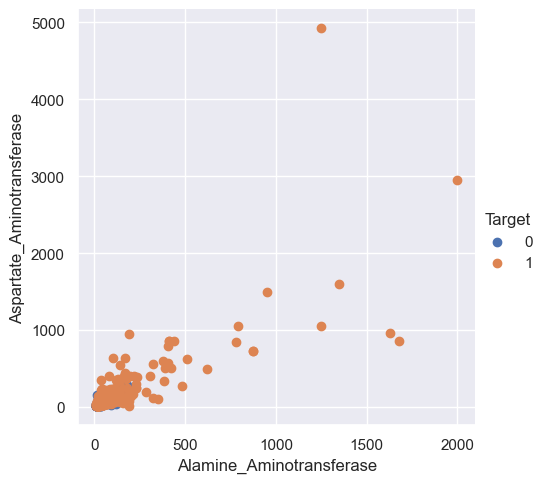

In [28]:
# Sets the background style
sns.set_style('darkgrid')

# FacetGrid 
sns.FacetGrid(dataset, hue = 'Target', size = 5).map(plt.scatter, 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase').add_legend();

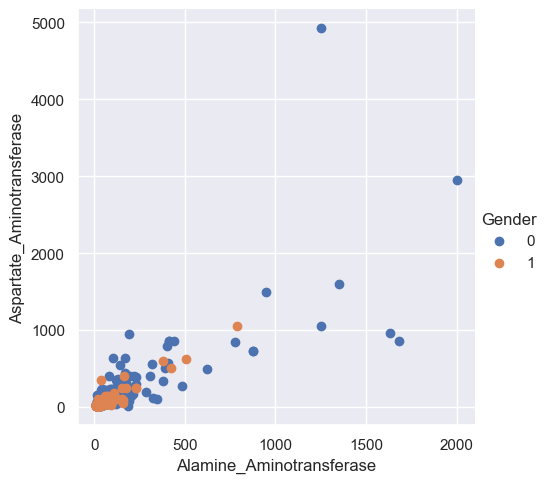

In [29]:
# Sets the background style
sns.set_style('darkgrid')

# FacetGrid
sns.FacetGrid(dataset, hue = 'Gender', size = 5).map(plt.scatter, 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase').add_legend();

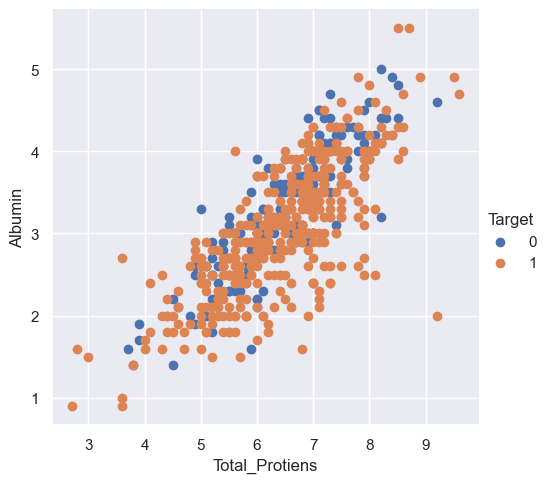

In [30]:
# Sets the background style
sns.set_style('darkgrid')

# FacetGrid 
sns.FacetGrid(dataset, hue = 'Target', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin').add_legend();

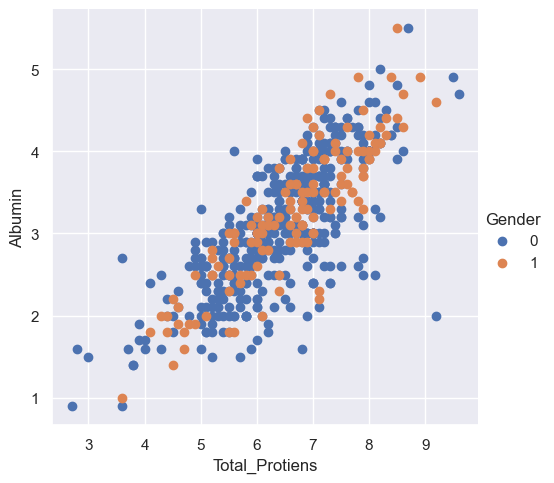

In [31]:
# Sets the background style
sns.set_style('darkgrid')

# FacetGrid
sns.FacetGrid(dataset, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin').add_legend();

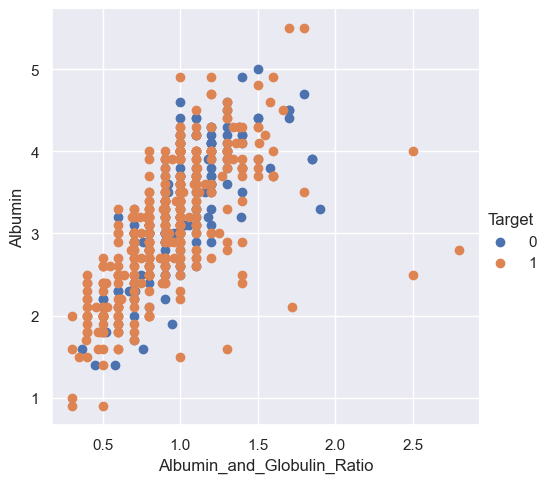

In [32]:
# Sets the background style
sns.set_style('darkgrid')

# FacetGrid 
sns.FacetGrid(dataset, hue = 'Target', size = 5).map(plt.scatter, 'Albumin_and_Globulin_Ratio', 'Albumin').add_legend();

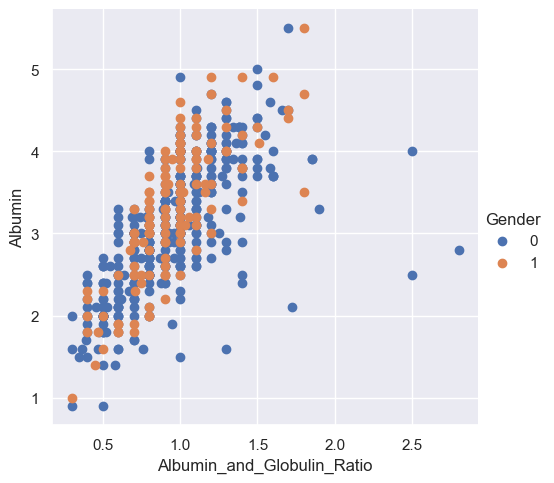

In [33]:
# Sets the background style
sns.set_style('darkgrid')

# FacetGrid
sns.FacetGrid(dataset, hue = 'Gender', size = 5).map(plt.scatter, 'Albumin_and_Globulin_Ratio', 'Albumin').add_legend();

## Checking for missing values and duplicate records

In [34]:
# Checking for missing values
dataset[dataset.isnull().values]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45       1              0.9               0.3                   189   
241   51       0              0.8               0.2                   230   
253   35       1              0.6               0.2                   180   
312   27       0              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Target  
209      3.9                         NaN       1  
241      3.1                         NaN       1  
253      2.7                         NaN       0  
312      4.8                         NaN       0

In [35]:
# Checking for duplicate records
dataset[dataset.duplicated(keep = False)]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
18    40       1              0.9               0.3                   293   
19    40       1              0.9               0.3                   293   
25    34       0              4.1               2.0                   289   
26    34       0              4.1               2.0                   289   
33    38       1              2.6               1.2                   410   
34    38       1              2.6               1.2                   410   
54    42       0              8.9               4.5                   272   
55    42       0              8.9               4.5                   272   
61    58       0              1.0               0.5                   158   
62    58       0              1.0               0.5                   158   
105   36       0              5.3               2.3                   145   
106   36       0              5.3               2.3                   145   
107   36       0              0.8               0.2                   158   
108   36       0              0.8               0.2                   158   
137   18       0              0.8               0.2                   282   
138   18       0              0.8               0.2                   282   
142   30       0              1.6               0.4                   332   
143   30       0              1.6               0.4                   332   
157   72       0              0.7               0.1                   196   
158   72       0              0.7               0.1                   196   
163   39       0              1.9               0.9                   180   
164   39       0              1.9               0.9                   180   
173   31       0              0.6               0.1                   175   
174   31       0              0.6               0.1                   175   
200   49       0              0.6               0.1                   218   
201   49       0              0.6               0.1                   218   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
18                        232                         245             6.8   
19                        232                         245             6.8   
25                        875                         731             5.0   
26                        875                         731             5.0   
33                         59                          57             5.6   
34                         59                          57             5.6   
54                         31                          61             5.8   
55                         31                          61             5.8   
61                         37                          43             7.2   
62                         37                          43             7.2   
105                        32                          92             5.1   
106                        32                          92             5.1   
107                        29                          39             6.0   
108                        29                          39             6.0   
137                        72                         140             5.5   
138                        72                         140             5.5   
142                        84                         139             5.6   
143                        84                         139             5.6   
157                        20                          35             5.8   
158                        20                          35             5.8   
163                        42                          62             7.4   
164                        42                          62             7.4   
173                        48                          34             6.0   
174                        48                          34             6.0   


## Data Cleansing
### Handling Duplicate Data Records

In [36]:
dataset.shape

(583, 11)

In [37]:
# Remove duplicate data records (Remove one of the duplicates)
dataset = dataset.drop_duplicates()
print(dataset.shape)

(570, 11)


### Detecting and Treating Outliers

In [38]:
dataset.describe()

Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  570.000000  570.000000       570.000000        570.000000   
mean    44.849123    0.245614         3.321754          1.497544   
std     16.242182    0.430829         6.267941          2.833231   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    0.000000         0.800000          0.200000   
50%     45.000000    0.000000         1.000000          0.300000   
75%     58.000000    0.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            570.000000                570.000000   
mean             291.750877                 79.728070   
std              245.291859                181.471697   
min               63.000000                 10.000000   
25%              176.000000                 23.000000   
50%              208.000000                 35.000000   
75%              298.000000                 60.000000   
max             2110.000000               2000.000000   

       Aspartate_Aminotransferase  Total_Protiens     Albumin  \
count                  570.000000      570.000000  570.000000   
mean                   109.380702        6.496316    3.148947   
std                    290.880671        1.088300    0.796813   
min                     10.000000        2.700000    0.900000   
25%                     25.000000        5.800000    2.600000   
50%                     41.000000        6.600000    3.100000   
75%                     86.750000        7.200000    3.800000   
max                   4929.000000        9.600000    5.500000   

       Albumin_and_Globulin_Ratio      Target  
count                  566.000000  570.000000  
mean                     0.948004    0.712281  
std                      0.319635    0.453097  
min                      0.300000    0.000000  
25%                      0.700000    0.000000  
50%                      0.950000    1.000000  
75%                      1.100000    1.000000  
max                      2.800000    1.000000

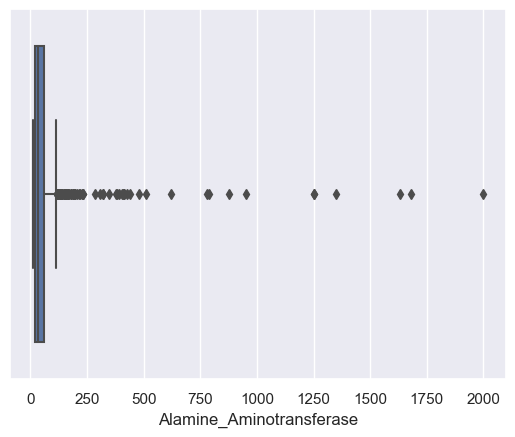

In [39]:
# Boxplot
sns.boxplot(dataset.Alamine_Aminotransferase);

In [40]:
# Frequency counting by value
dataset.value_counts('Alamine_Aminotransferase').sort_index().tail()

Alamine_Aminotransferase
1250    2
1350    1
1630    1
1680    1
2000    1
dtype: int64

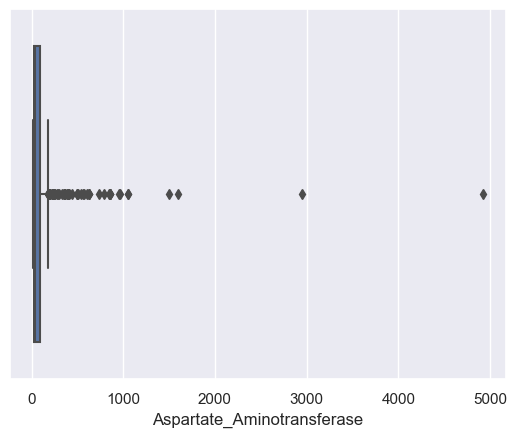

In [41]:
# Boxplot
sns.boxplot(dataset.Aspartate_Aminotransferase);

In [42]:
# Frequency counting by value
dataset.value_counts('Aspartate_Aminotransferase').sort_index().tail()

Aspartate_Aminotransferase
1050    2
1500    1
1600    1
2946    1
4929    1
dtype: int64

In [43]:
dataset.Aspartate_Aminotransferase.sort_values().tail()

119    1050
207    1500
118    1600
117    2946
135    4929
Name: Aspartate_Aminotransferase, dtype: int64

In [44]:
# Keeps only those records where the value is less than or equal to 3000
dataset = dataset[dataset.Aspartate_Aminotransferase <= 3000]
dataset.shape

(569, 11)

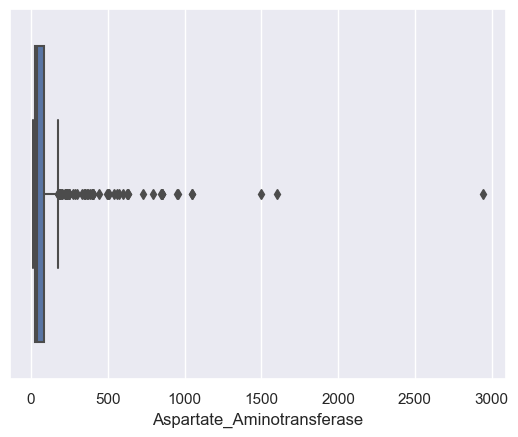

In [45]:
# Boxplot
sns.boxplot(dataset.Aspartate_Aminotransferase);

In [46]:
# Frequency counting by value
dataset.value_counts('Aspartate_Aminotransferase').sort_index().tail()

Aspartate_Aminotransferase
960     1
1050    2
1500    1
1600    1
2946    1
dtype: int64

In [47]:
# Keeps only those records where the value is less than or equal to 2500
dataset = dataset[dataset.Aspartate_Aminotransferase <= 2500]
dataset.shape

(568, 11)

In [48]:
dataset.describe()

Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  568.000000  568.000000       568.000000        568.000000   
mean    44.834507    0.246479         3.291197          1.482042   
std     16.237569    0.431340         6.257583          2.826056   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    0.000000         0.800000          0.200000   
50%     45.000000    0.000000         1.000000          0.300000   
75%     58.000000    0.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            568.000000                568.000000   
mean             290.482394                 74.286972   
std              243.271522                155.240601   
min               63.000000                 10.000000   
25%              175.750000                 23.000000   
50%              208.000000                 35.000000   
75%              298.000000                 60.000000   
max             2110.000000               1680.000000   

       Aspartate_Aminotransferase  Total_Protiens     Albumin  \
count                  568.000000      568.000000  568.000000   
mean                    95.901408        6.496831    3.150000   
std                    171.956479        1.089500    0.797571   
min                     10.000000        2.700000    0.900000   
25%                     25.000000        5.800000    2.600000   
50%                     41.000000        6.600000    3.100000   
75%                     86.000000        7.200000    3.800000   
max                   1600.000000        9.600000    5.500000   

       Albumin_and_Globulin_Ratio      Target  
count                  564.000000  568.000000  
mean                     0.948174    0.711268  
std                      0.319301    0.453573  
min                      0.300000    0.000000  
25%                      0.700000    0.000000  
50%                      0.950000    1.000000  
75%                      1.100000    1.000000  
max                      2.800000    1.000000

### Handling missing values

In [49]:
# Check if there is missing values in the dataframe
dataset.isnull().values.any()

True

In [50]:
# Check how many columns has missing values
dataset.isnull().values.any().sum()

1

In [51]:
# List of missing values
dataset[dataset.isnull().values]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45       1              0.9               0.3                   189   
241   51       0              0.8               0.2                   230   
253   35       1              0.6               0.2                   180   
312   27       0              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Target  
209      3.9                         NaN       1  
241      3.1                         NaN       1  
253      2.7                         NaN       0  
312      4.8                         NaN       0

In [52]:
dataset.shape

(568, 11)

In [53]:
# deletes records with missing values in any column
dataset = dataset.dropna(how = 'any')

In [54]:
dataset.shape

(564, 11)

In [55]:
dataset[dataset.isnull().values]

Empty DataFrame
Columns: [Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio, Target]
Index: []

In [56]:
dataset.sample(5)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
497   67       0              2.2               1.1                   198   
65    57       0              1.4               0.7                   470   
578   60       0              0.5               0.1                   500   
20    51       0              2.2               1.0                   610   
198   41       0              0.9               0.2                   169   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
497                        42                          39             7.2   
65                         62                          88             5.6   
578                        20                          34             5.9   
20                         17                          28             7.3   
198                        22                          18             6.1   

     Albumin  Albumin_and_Globulin_Ratio  Target  
497      3.0                        0.70       1  
65       2.5                        0.80       1  
578      1.6                        0.37       0  
20       2.6                        0.55       1  
198      3.0                        0.90       0

## Data preprocessing

In [57]:
# Given the high correlation between variables Direct_Bilirubin and Total_Bilirubin, we will remove Direct_Bilirubin
dataset = dataset.drop('Direct_Bilirubin', 1)

In [58]:
dataset.shape

(564, 10)

### Splitting Data into Training and Test

In [59]:
dataset.head()

Age  Gender  Total_Bilirubin  Alkaline_Phosphotase  \
0   65       1              0.7                   187   
1   62       0             10.9                   699   
2   62       0              7.3                   490   
3   58       0              1.0                   182   
4   72       0              3.9                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Target  
0      3.3                        0.90       1  
1      3.2                        0.74       1  
2      3.3                        0.89       1  
3      3.4                        1.00       1  
4      2.4                        0.40       1

In [60]:
# Create a different object to the target variable
y = dataset.Target

In [61]:
# Create a different object to the input variables
X = dataset.drop('Target', axis = 1)

In [62]:
# Split data into training and test data with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 1234,
                                                   stratify = dataset.Target)

In [63]:
len(X_train)

423

In [64]:
len(X_test)

141

In [65]:
# Print shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(423, 9) (141, 9) (423,) (141,)


In [66]:
X_train.head(2)

Age  Gender  Total_Bilirubin  Alkaline_Phosphotase  \
205   45       0              2.5                   163   
390   72       0              0.8                   148   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
205                        28                          22             7.6   
390                        23                          35             6.0   

     Albumin  Albumin_and_Globulin_Ratio  
205      4.0                         1.1  
390      3.0                         1.0

### Class Balance

In [67]:
y_train.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [68]:
# Install package
!pip install -q imbalanced-learn

In [69]:
# Import the function SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [70]:
%reload_ext watermark
%watermark -a 'Bianca Amorim' --iversions

Author: Bianca Amorim

matplotlib: 3.4.3
pandas    : 1.4.2
seaborn   : 0.11.2
joblib    : 1.1.0
sklearn   : 1.1.3
numpy     : 1.22.3
imblearn  : 0.0



In [71]:
# Let's apply the oversampling technique and increase the number of examples of the minority class
over_sampler = SMOTE(k_neighbors = 2)

In [72]:
# Apply oversampling (should be done with training data only)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [73]:
len(X_res)

602

In [74]:
len(y_res)

602

In [75]:
y_train.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [76]:
# Ajust the name of the train dataset to X
X_train = X_res

In [77]:
# Ajust the name of the train dataset to y
y_train = y_res

### Data Standardization

In [78]:
X_train.head()

Age  Gender  Total_Bilirubin  Alkaline_Phosphotase  \
0   45       0              2.5                   163   
1   72       0              0.8                   148   
2   18       0              0.8                   282   
3   42       0              8.9                   272   
4   42       0              0.8                   127   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        28                          22             7.6   
1                        23                          35             6.0   
2                        72                         140             5.5   
3                        31                          61             5.8   
4                        29                          30             4.9   

   Albumin  Albumin_and_Globulin_Ratio  
0      4.0                         1.1  
1      3.0                         1.0  
2      2.5                         0.8  
3      2.0                         0.5  
4      2.7                         1.2

In [79]:
# Calculate mean and standart deviation of the training data
train_mean = X_train.mean()
train_std = X_train.std()
print(train_mean)
print('-----')
print(train_std)

Age                            44.088040
Gender                          0.207641
Total_Bilirubin                 2.669055
Alkaline_Phosphotase          264.700997
Alamine_Aminotransferase       62.200997
Aspartate_Aminotransferase     78.554817
Total_Protiens                  6.510174
Albumin                         3.238613
Albumin_and_Globulin_Ratio      0.998663
dtype: float64
-----
Age                            16.383625
Gender                          0.405956
Total_Bilirubin                 5.561164
Alkaline_Phosphotase          218.160950
Alamine_Aminotransferase      140.008406
Aspartate_Aminotransferase    144.058078
Total_Protiens                  1.034908
Albumin                         0.759833
Albumin_and_Globulin_Ratio      0.309848
dtype: float64


In [80]:
# Standarization
X_train = (X_train - train_mean) / train_std

In [81]:
X_train.head()

Age    Gender  Total_Bilirubin  Alkaline_Phosphotase  \
0  0.055663 -0.511487        -0.030399             -0.466174   
1  1.703650 -0.511487        -0.336091             -0.534931   
2 -1.592324 -0.511487        -0.336091              0.079295   
3 -0.127447 -0.511487         1.120439              0.033457   
4 -0.127447 -0.511487        -0.336091             -0.631190   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                 -0.244278                   -0.392583        1.053065   
1                 -0.279990                   -0.302342       -0.492966   
2                  0.069989                    0.426531       -0.976100   
3                 -0.222851                   -0.121859       -0.686220   
4                 -0.237136                   -0.337050       -1.555862   

    Albumin  Albumin_and_Globulin_Ratio  
0  1.002045                    0.327054  
1 -0.314033                    0.004316  
2 -0.972072                   -0.641161  
3 -1.630112                   -1.609377  
4 -0.708857                    0.649793

In [82]:
X_train.describe()

Age        Gender  Total_Bilirubin  Alkaline_Phosphotase  \
count  6.020000e+02  6.020000e+02     6.020000e+02          6.020000e+02   
mean  -8.077702e-17  1.528493e-15    -4.850310e-16          6.888178e-17   
std    1.000000e+00  1.000000e+00     1.000000e+00          1.000000e+00   
min   -2.446836e+00 -5.114872e-01    -4.080180e-01         -9.245513e-01   
25%   -7.378123e-01 -5.114872e-01    -3.446150e-01         -4.295040e-01   
50%    8.618118e-02 -5.114872e-01    -3.172321e-01         -3.149097e-01   
75%    7.881015e-01 -5.114872e-01    -1.401034e-01          6.898120e-02   
max    2.802308e+00  1.951835e+00     1.300644e+01          8.458429e+00   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count              6.020000e+02                6.020000e+02    6.020000e+02   
mean              -7.704247e-17               -1.384551e-16   -1.551361e-15   
std                1.000000e+00                1.000000e+00    1.000000e+00   
min               -3.728419e-01               -4.758832e-01   -3.681654e+00   
25%               -2.871327e-01               -3.787002e-01   -6.708660e-01   
50%               -2.157085e-01               -2.815171e-01    8.679570e-02   
75%               -7.285989e-02               -5.938450e-02    6.665571e-01   
max                1.155501e+01                1.056133e+01    2.985603e+00   

            Albumin  Albumin_and_Globulin_Ratio  
count  6.020000e+02                6.020000e+02  
mean  -2.350279e-15                8.841211e-16  
std    1.000000e+00                1.000000e+00  
min   -3.077798e+00               -2.254853e+00  
25%   -7.088568e-01               -6.411612e-01  
50%    5.645216e-03                4.315719e-03  
75%    8.416660e-01                5.705010e-01  
max    2.976163e+00                5.813608e+00

In [83]:
# We use the mean and standard deviation of the training data to standardize the test data set
X_test = (X_test - train_mean) / train_std

In [84]:
# Describe
X_test.head()

Age    Gender  Total_Bilirubin  Alkaline_Phosphotase  \
220 -0.432630 -0.511487        -0.336091             -0.539515   
448  0.238773  1.951835        -0.336091             -0.562433   
509  0.116699 -0.511487         3.116424             -0.049051   
415  1.581577 -0.511487        -0.246181              1.949474   
56  -0.676776 -0.511487        -0.336091             -0.305742   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
220                 -0.251421                   -0.225984       -1.459235   
448                 -0.258563                   -0.371759       -0.492966   
509                  0.555674                    3.203189       -1.072727   
415                  0.219980                   -0.267634       -2.812011   
56                  -0.258563                   -0.385642        1.439572   

      Albumin  Albumin_and_Globulin_Ratio  
220 -0.972072                    0.004316  
448 -0.840465                   -0.963900  
509 -0.314033                    0.649793  
415 -0.708857                   -0.963900  
56   1.002045                    0.004316

## Building, Training and Evaluating Model 1 with Logistic Regression (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

For the first version of the model the ideal is to choose a simple algorithm that is easy to understand and that will be used as a Benchmark.

**Note:** Since part of the process involves randomness, the results may be slightly different with each run from notebook jupyter.

In [85]:
# Set the hyperparameters list
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                  'penalty': ['l1', 'l2']}

In [86]:
# Create the modelo with GridSearch
# Several models will be create with different combinations of hyperparameters
model_v1 = GridSearchCV(LogisticRegression(),
                       tuned_params_v1,
                       scoring = 'roc_auc',
                       n_jobs = -1)

In [87]:
# Training the model
model_v1.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [88]:
# Select the best model
model_v1.best_estimator_

LogisticRegression(C=1)

In [89]:
# Predictions with test data
y_pred_v1 = model_v1.predict(X_test)

In [90]:
# Show the first 10 predictions
y_pred_v1[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [91]:
# We obtain the predictions in probability format for each class.
y_pred_proba_v1 = model_v1.predict_proba(X_test)

In [92]:
# Show the first 10 predictions
y_pred_proba_v1[:10]

array([[7.64623873e-01, 2.35376127e-01],
       [5.04079155e-01, 4.95920845e-01],
       [1.93480439e-04, 9.99806520e-01],
       [5.45952489e-01, 4.54047511e-01],
       [6.67213407e-01, 3.32786593e-01],
       [6.37321092e-01, 3.62678908e-01],
       [7.33382962e-01, 2.66617038e-01],
       [7.47734051e-02, 9.25226595e-01],
       [5.67678530e-01, 4.32321470e-01],
       [4.98526977e-03, 9.95014730e-01]])

In [93]:
# We obtain the predictions in probability format by filtering for the positive class. 
# We need this to calculate the ROC curve
y_pred_proba_v1 = model_v1.predict_proba(X_test)[:,1]

In [94]:
# Show the first 10 predictions
y_pred_proba_v1[:10]

array([0.23537613, 0.49592084, 0.99980652, 0.45404751, 0.33278659,
       0.36267891, 0.26661704, 0.92522659, 0.43232147, 0.99501473])

In [95]:
# As an example, let's check one of the data points (change the value of i if you wish)
i = 16
print(' For the data point {}, right class = {}, predicted class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

 For the data point 16, right class = 1, predicted class = 1, predicted probability = 0.7104047091399289


In [96]:
# Confusion matrix
confusion_matrix(y_test, y_pred_v1)

array([[31,  9],
       [44, 57]])

In [97]:
# Extract each value of CM
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_v1).ravel()

In [98]:
print(tn, fp, fn, tp)

31 9 44 57


In [99]:
# Calculating the global metric AUC (area under the curve) with real data and test predictions
roc_auc_v1 = roc_auc_score(y_test, y_pred_v1)
print(roc_auc_v1)

0.6696782178217823


In [100]:
# Calculating the ROC curve with test data and predictions
fpr_v1, tpr_v1, thresholds = roc_curve(y_test, y_pred_proba_v1)

In [101]:
# AUC in test
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7373762376237624


In [102]:
# Accuracy in test
accuracy_v1 = accuracy_score(y_test, y_pred_v1)
print(accuracy_v1)

0.624113475177305


### Feature Importance

In [161]:
# Building the model again with the best hyperparameters. 
# This is necessary because the final version should not have GridSearchCV
model_v1 = LogisticRegression(C = 1)
model_v1.fit(X_train, y_train)

LogisticRegression(C=1)

In [162]:
# We get the coefficients by the largest using np.argsot
index = np.argsort(-abs(model_v1.coef_[0,:]))

In [163]:
print('Most important variables for the result of the model_v1:')
print(60*'-')
for feature in X.columns[index]:
    print(feature)

Most important variables for the result of the model_v1:
------------------------------------------------------------
Total_Bilirubin
Alamine_Aminotransferase
Aspartate_Aminotransferase
Albumin
Total_Protiens
Alkaline_Phosphotase
Gender
Age
Albumin_and_Globulin_Ratio


In [164]:
# Save model in disk
with open('models/model_v1.pk1', 'wb') as pickle_file:
    joblib.dump(model_v1, 'models/model_v1.pk1')

In [165]:
# Create a dataframe to receive the metrics for each model
df_models = pd.DataFrame()

In [166]:
# Dictionary with model_v1 metrics
dict_model_v1 = {'Name': 'model_v1',
                'Algorithm': 'Logistic Regression',
                'ROC_AUC Score': roc_auc_v1,
                'AUC Score': auc_v1,
                'Accuracy': accuracy_v1}

In [167]:
# Append dict to the dataframe
df_models = df_models.append(dict_model_v1, ignore_index= True)

In [168]:
display(df_models)

Name            Algorithm  ROC_AUC Score  AUC Score  Accuracy
0  model_v1  Logistic Regression       0.669678   0.737376  0.624113

## Building, Training and Evaluating Model 2 with Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Our challenge now is to try to get a better model than version 1. Let's try the Random Forest algorithm

In [169]:
# Grid with hyperparameters
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]}

In [170]:
# Create a modelo with RandomizedSearchCV to search the best hyperparameters combination
model_v2 = RandomizedSearchCV(RandomForestClassifier(),
                             tuned_params_v2,
                             n_iter = 15,
                             scoring = 'roc_auc',
                             n_jobs = -1)

In [171]:
# Train model
model_v2.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [172]:
# Extract best estimator
model_v2.best_estimator_

RandomForestClassifier(min_samples_split=5, n_estimators=300)

In [173]:
# Predictions with test data
y_pred_v2 = model_v2.predict(X_test)

In [174]:
# Predictions in probability format to the positive class 
y_pred_proba_v2 = model_v2.predict_proba(X_test)[:,1]

In [175]:
# Confucion matrix
confusion_matrix(y_test, y_pred_v2)

array([[21, 19],
       [22, 79]])

In [176]:
# Calculating the global metric AUC (area under the curve) with real data and test predictions
roc_auc_v2 = roc_auc_score(y_test, y_pred_proba_v2)
print(roc_auc_v2)

0.7452970297029703


In [177]:
# Calculating the ROC curve with test data and predictions
fpr_v2, tpr_v2, thresholds = roc_curve(y_test, y_pred_proba_v2)

In [178]:
# AUC in test
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7452970297029703


In [179]:
# Accuracy in test
accuracy_v2 = accuracy_score(y_test, y_pred_v2)
print(accuracy_v2)

0.7092198581560284


### Feature Importance

In [180]:
# Recreate model with the best hyperparameters
model_v2 = RandomForestClassifier(n_estimators= 300, min_samples_split = 5, min_samples_leaf= 4)
model_v2.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300)

In [181]:
# Most relevant variables
index = np.argsort(-model_v2.feature_importances_)
print('Most important variables for the result of the model_v2:')
print(60*'-')
for feature in X.columns[index]:
    print(feature)

Most important variables for the result of the model_v2:
------------------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Alamine_Aminotransferase
Albumin_and_Globulin_Ratio
Age
Total_Protiens
Albumin
Gender


In [182]:
# Save model in disk
with open('models/model_v2.pk1', 'wb') as pickle_files:
    joblib.dump(model_v2, 'models/model_v2.pk1')

In [183]:
# Dictionary with model_v2 metrics
dict_model_v2 = {'Name': 'model_v2',
                'Algorithm': 'Random Forest',
                'ROC_AUC Score': roc_auc_v2,
                'AUC Score': auc_v2,
                'Accuracy': accuracy_v2}

In [184]:
# Append dict to the dataframe
df_models = df_models.append(dict_model_v2, ignore_index= True)

In [185]:
display(df_models)

Name            Algorithm  ROC_AUC Score  AUC Score  Accuracy
0  model_v1  Logistic Regression       0.669678   0.737376  0.624113
1  model_v2        Random Forest       0.745297   0.745297  0.709220

## Building, Training and Evaluating Model 3 with KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Let's try a simpler algorithm, KNN. For this algorithm we first need to set the value of K, which is the number of nearest neighbors.

In [186]:
# List of possible values of K
neighbors = list(range(1, 20, 2))

In [187]:
# List to scores
cv_scores = []

In [188]:
# Cross-validation to determine the best value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [189]:
# Adjusting the classification error
error = [1 - x for x in cv_scores]

In [190]:
# Determining the best value of k (with smallest error)
optimal_k = neighbors[error.index(min(error))]
print('The optimal value of k is %d' %optimal_k)

The optimal value of k is 1


In [191]:
# Create the version 3 of the model
model_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [192]:
# Train the model
model_v3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [193]:
# Predict
y_pred_v3 = model_v3.predict(X_test)

In [194]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_v3)

array([[18, 22],
       [38, 63]])

In [195]:
# Probability prediction of the positive class
y_pred_proba_v3 = model_v3.predict_proba(X_test)[:,1]

In [196]:
# Calculate ROC_AUC in test
roc_auc_v3 = roc_auc_score(y_test, y_pred_v3)
print(roc_auc_v3)

0.5368811881188119


In [197]:
# Calculate curve ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_test, y_pred_proba_v3)

In [198]:
# Calculate AUC in test
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.5368811881188119


In [199]:
# Calculate accuracy
accuracy_v3 = accuracy_score(y_test, y_pred_v3)
print(accuracy_v3) 

0.574468085106383


**Note:** We can not extract the most important variables with KNN, because KNN has a different concept.

In [200]:
# Save the model in disk
with open('models/model_v3.pk1', 'wb') as pickle_file:
    joblib.dump(model_v3, 'models/model_v3.pk1')

In [201]:
# Dictionary with model_v3 metrics
dict_model_v3 = {'Name': 'model_v3',
                'Algorithm': 'KNN',
                'ROC_AUC Score': roc_auc_v3,
                'AUC Score': auc_v3,
                'Accuracy': accuracy_v3}

In [202]:
# Append dict to dataframe
df_models = df_models.append(dict_model_v3, ignore_index = True)

In [203]:
display(df_models)

Name            Algorithm  ROC_AUC Score  AUC Score  Accuracy
0  model_v1  Logistic Regression       0.669678   0.737376  0.624113
1  model_v2        Random Forest       0.745297   0.745297  0.709220
2  model_v3                  KNN       0.536881   0.536881  0.574468

## Building, Training and Evaluating Model 4 with Decision tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [204]:
# Hyperparameters
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7],
                  'min_samples_leaf': [1, 2, 3, 4, 6],
                  'max_depth': [2, 3, 4, 5, 6, 7]}

In [205]:
# Create a model with RandomizedSearchCV
model_v4 = RandomizedSearchCV(DecisionTreeClassifier(),
                             tuned_params_v4,
                             n_iter = 15,
                             scoring = 'roc_auc',
                             n_jobs = -1)

In [206]:
# Training model 4
model_v4.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [207]:
# Better estimator
model_v4.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=7)

In [208]:
# Class predictions
y_pred_v4 = model_v4.predict(X_test)

In [209]:
# Probability predictions
y_pred_proba_v4 = model_v4.predict_proba(X_test)[:,1]

In [210]:
# Confusion matrix
confusion_matrix(y_test, y_pred_v4)

array([[25, 15],
       [40, 61]])

In [211]:
# Calculate ROC AUC score
roc_auc_v4 = roc_auc_score(y_test, y_pred_v4)
print(roc_auc_v4)

0.614480198019802


In [212]:
# Calculate curve ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_test, y_pred_proba_v4)

In [213]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6206683168316832


In [214]:
# Calculate accuracy
accuracy_v4 = accuracy_score(y_test, y_pred_v4)
print(accuracy_v4)

0.6099290780141844


### Feature Importance

In [215]:
# Recreate model
model_v4 = DecisionTreeClassifier(min_samples_split = 7, min_samples_leaf = 3, max_depth = 3)
model_v4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=7)

In [216]:
# Most important variable
index = np.argsort(-model_v4.feature_importances_)
print('Most important variables for the result of the model_v4:')
print(60*'-')
for feature in X.columns[index]:
    print(feature)

Most important variables for the result of the model_v4:
------------------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Alamine_Aminotransferase
Age
Gender
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio


In [217]:
# Save model in disk
with open('models/model_v4.pk1', 'wb') as pickle_file:
    joblib.dump(model_v4, 'models/model_v4.pk1')

In [218]:
# Dictionary with the metrics of model_v4
dict_model_v4 = {'Name': 'model_v4',
                'Algorithm': 'Decision Tree',
                'ROC_AUC Score': roc_auc_v4,
                'AUC Score': auc_v4,
                'Accuracy': accuracy_v4}

In [219]:
df_models = df_models.append(dict_model_v4, ignore_index = True)

In [220]:
display(df_models)

Name            Algorithm  ROC_AUC Score  AUC Score  Accuracy
0  model_v1  Logistic Regression       0.669678   0.737376  0.624113
1  model_v2        Random Forest       0.745297   0.745297  0.709220
2  model_v3                  KNN       0.536881   0.536881  0.574468
3  model_v4        Decision Tree       0.614480   0.620668  0.609929

## Building, Training and Evaluating Model 5 with SVM

https://scikit-learn.org/stable/modules/svm.html

In [224]:
# Function to select hyperparameters
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1, 10]
    param_grid = {'C': Cs, 'gamma': gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [225]:
# Apply the function
svc_param_selection(X_train, y_train, 5)

{'C': 10, 'gamma': 10}

In [226]:
# Create a model with the best Hyperparameters
model_v5 = SVC(C = 1, gamma = 1, probability = True)

In [227]:
# Training model
model_v5.fit(X_train, y_train)

SVC(C=1, gamma=1, probability=True)

In [228]:
# Class Predictions
y_pred_v5 = model_v5.predict(X_test)

In [229]:
# Confusion matrix
confusion_matrix(y_test, y_pred_v5)

array([[14, 26],
       [30, 71]])

In [230]:
# Probability predictions 
y_pred_proba_v5 = model_v5.predict_proba(X_test)[:,1]

In [231]:
# Calculate ROC AUC score
roc_auc_v5 = roc_auc_score(y_test, y_pred_v5)
print(roc_auc_v5)

0.5264851485148514


In [232]:
# Calculate curve ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_test, y_pred_proba_v5)

In [233]:
# Calculate AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.5995049504950495


In [234]:
# Calculate accuracy
accuracy_v5 = accuracy_score(y_test, y_pred_v5)
print(accuracy_v5)

0.6028368794326241


In [235]:
# Save model in disk
with open('models/model_v5.pk1', 'wb') as pickle_file:
    joblib.dump(model_v5, 'models/model_v4.pk1')

In [236]:
# Dictionary with model_v3 metrics
dict_model_v5 = {'Name': 'model_v5',
                'Algorithm': 'SVM',
                'ROC_AUC Score': roc_auc_v5,
                'AUC Score': auc_v5,
                'Accuracy': accuracy_v5}

In [237]:
# Append dict to dataframe
df_models = df_models.append(dict_model_v5, ignore_index = True)

In [238]:
display(df_models)

Name            Algorithm  ROC_AUC Score  AUC Score  Accuracy
0  model_v1  Logistic Regression       0.669678   0.737376  0.624113
1  model_v2        Random Forest       0.745297   0.745297  0.709220
2  model_v3                  KNN       0.536881   0.536881  0.574468
3  model_v4        Decision Tree       0.614480   0.620668  0.609929
4  model_v5                  SVM       0.526485   0.599505  0.602837

## Selecting the Best Model

In [239]:
# We will use the model with the highest AUC score because it is a global metric. 
# The AUC score is ideal for comparing models from different algorithms
df_best_model = df_models[df_models['AUC Score'] == df_models['AUC Score'].max()]

In [240]:
df_best_model

Name      Algorithm  ROC_AUC Score  AUC Score  Accuracy
1  model_v2  Random Forest       0.745297   0.745297   0.70922

0.7452970297029703